In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Owning

In [68]:
# https://www.zillow.com/research/data/

# all single-family residences, condo/coops

# typical value for homes that fall within the 5th to 35th percentile range
bottom_tier = pd.read_csv("./data/zillow-all-homes-bottom-tier-time-series.csv")

# typical value for homes that fall within the 35th to 65th percentile range
mid_tier = pd.read_csv("./data/zillow-all-homes-mid-tier-time-series.csv")

# typical value for homes that fall within the 65th to 95th percentile range
top_tier = pd.read_csv("./data/zillow-all-homes-top-tier-time-series.csv")

In [69]:
# single-family homes only
single_family = pd.read_csv("./data/zillow-single-fam-homes-time-series.csv")

In [70]:
# bottom_tier and top_tier start later than mid-tier. strat: drop earlier mid-tier data.
dates = bottom_tier.columns.drop(
    ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
)

regions_of_interest = [
    "United States", 
    "Chicago, IL", 
    "Madison, WI", 
    "San Francisco, CA",
    "San Jose, CA",
    "Los Angeles-Long Beach-Anaheim, CA",
    "San Diego, CA"
]

In [78]:
data = {
    "bottom": {},
    "mid": {},
    "top": {}
}

tier_dfs = {
    "bottom": bottom_tier,
    "mid": mid_tier,
    "top": top_tier
}

tier_to_time_series_by_region_dict = {}

for region in regions_of_interest:
    for tier_name, tier_df in tier_dfs.items():
        ts = tier_df.where(tier_df["RegionName"] == region).dropna(how="all")[dates]
        data[tier_name][region] = ts.T.fillna(method="bfill").values.reshape(-1)

for tier_name in tier_dfs.keys():
    tier_to_time_series_by_region_dict[tier_name] = pd.DataFrame(data[tier_name], index=dates)

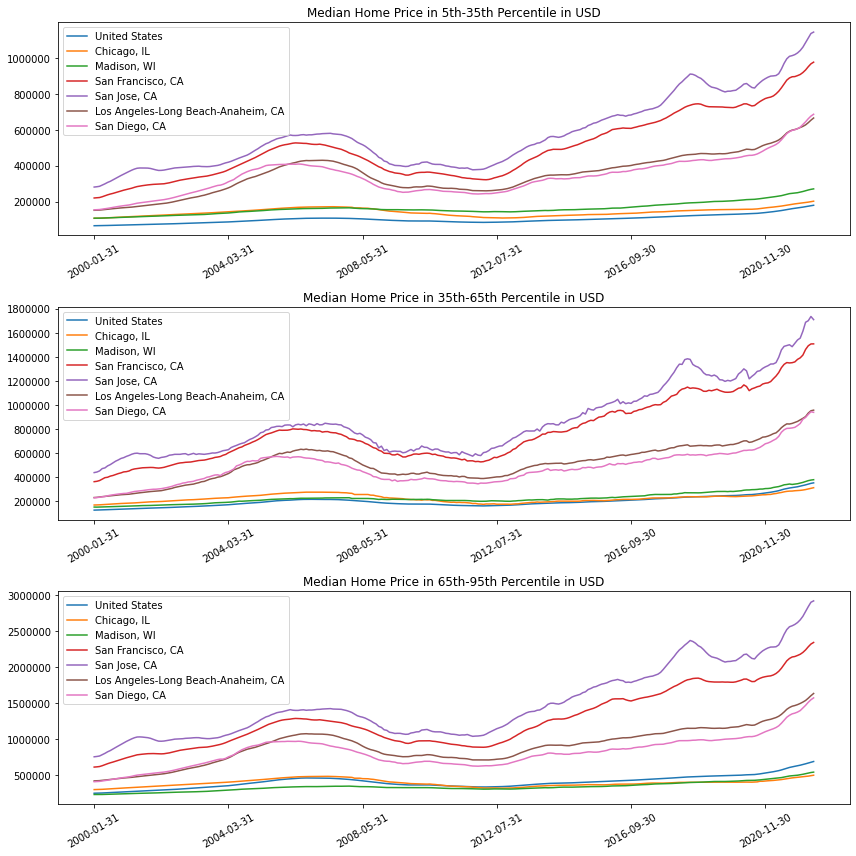

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,12))

ax1.set_title("Median Home Price in 5th-35th Percentile in USD")
tier_to_time_series_by_region_dict['bottom'].plot(ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax1.ticklabel_format(axis='y', style='plain')

ax2.set_title("Median Home Price in 35th-65th Percentile in USD")
tier_to_time_series_by_region_dict['mid'].plot(ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
ax2.ticklabel_format(axis='y', style='plain')

ax3.set_title("Median Home Price in 65th-95th Percentile in USD")
tier_to_time_series_by_region_dict['top'].plot(ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)
ax3.ticklabel_format(axis='y', style='plain')

fig.tight_layout();

# Renting

In [117]:
rentals = pd.read_csv("./data/zillow-home-and-apartment-rental-time-series.csv")

In [126]:
data = {}

dates = rentals.columns.drop(['RegionID', 'RegionName', 'SizeRank'])

for region in regions_of_interest:
    ts = rentals.where(rentals["RegionName"] == region).dropna(how="all")[dates]
    data[region] = ts.T.fillna(method="bfill").values.reshape(-1)
    
rentals_df = pd.DataFrame(data, index=dates)

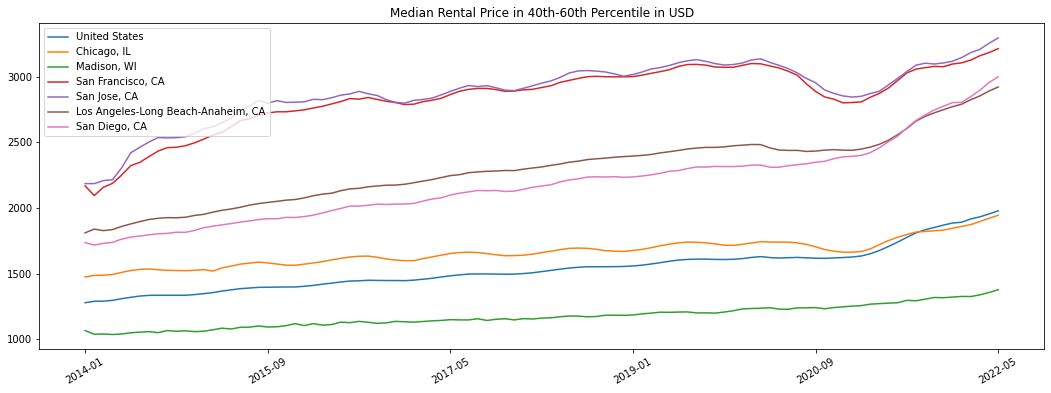

In [130]:
fig, (ax1) = plt.subplots(1,1, figsize=(18,6))

ax1.set_title("Median Rental Price in 40th-60th Percentile in USD")
rentals_df.plot(ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax1.ticklabel_format(axis='y', style='plain')